In [67]:
#learn a (1D) curve

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torch.optim as optim

import torch.nn as nn
import torch.nn.functional as F

import mpld3

In [180]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(1,10)
#         #self.fc2 = nn.Linear(10,10)
#         self.fc3 = nn.Linear(10,1)
#         self.act = F.relu
        
#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.act(x)
#         #x = self.fc2(x)
#         #x = self.act(x)
#         x = self.fc3(x)
#         return x

def f(x):
    return 5*torch.sin(3*x)
    return 500*torch.sin(x) + 1000

def noise(x):
    size = x.size()
    return 0
    return Variable(torch.randn(*size))



def getNet(l, activation=nn.ReLU()):
    layers = []
    for i in range(1, len(l)):
        layers.append(nn.Linear(l[i-1],l[i]))
        if i!= len(l)-1:
            layers.append(activation)
    net = nn.Sequential(*layers)
    return net



def train(net, steps):
    
    mse = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=0.03)

    x = Variable(torch.rand(10000,1)*6)
    mean = x.mean()
    std = x.std()

    y_ = f(x)
    ymean = y_.mean()
    ystd = y_.std()

    normalizeX = True
    normalizeY = True

    for _ in range(steps):
        x = Variable(torch.rand(10,1)*6)
        y_ = f(x)+noise(x)

        if normalizeX:
            x = (x-mean)/std
        if normalizeY:
            y_ = (y_-ymean)/ystd

        y = net(x)
        loss = mse(y, y_)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()
    return net

    
def plot(net, figsize=[8,4]):
    #test data
    x = Variable(torch.linspace(-6,12).resize_(100,1))
    y_ = f(x) + noise(x)
    y = net(x)

    if normalizeX:
        x1 = (x-mean)/std
    else:
        x1 = x

    if normalizeY:
        y1_= (y_-ymean)/ystd
        y1 = net(x1)
        y = y1*ystd+ymean
    else:
        y1_= y_
        y1 = net(x1)

    #plt.subplot(211)
    plt.figure(figsize=figsize)
    plt.plot(x.data.numpy(), y_.data.numpy(), 'o',c='#eeeeee')
    plt.plot(x.data.numpy()[33:66], y_.data.numpy()[33:66], '.')
    plt.plot(x.data.numpy(), y.data.numpy(), '.-')
    # plt.subplot(212)
#     plt.figure(figsize=figsize)
#     plt.plot(x1.data.numpy(), y1_.data.numpy(), 'o',c='#eeeeee')
#     plt.plot(x1.data.numpy()[33:66], y1_.data.numpy()[33:66], '.')
#     plt.plot(x1.data.numpy(), y1.data.numpy(), '.-')
#     plt.show()


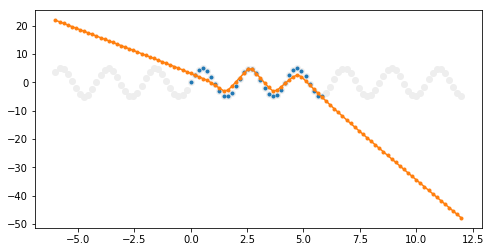

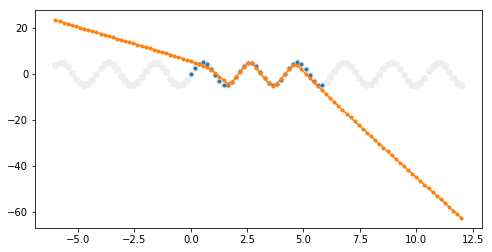

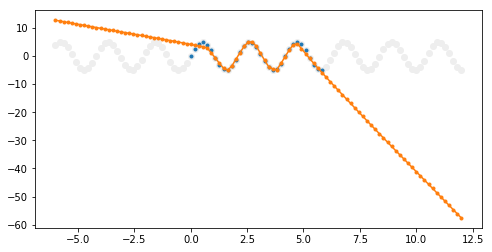

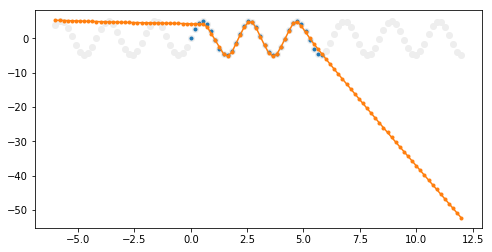

In [189]:
mpld3.disable_notebook()
#mpld3.enable_notebook()

net = getNet([1,100,100,1], activation=nn.ReLU())
for step in [800]*4:
    net = train(net, step)
    plot(net, figsize=[8,4])

In [139]:
for i in list(net.parameters()):
    #print i
    pass